# Data Preprocessing

### Data from [manythings.org](http://www.manythings.org/anki/)

In [1]:
import pandas as pd
import pickle
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [2]:
!ls

Data
EDA_And_Cleaning_Text.ipynb


In [3]:
df = pd.read_csv('Data/mar.txt',encoding='utf-8', sep='	',  names=['English', 'Marathi', 'Attribution'])

In [4]:
df.head()

,English,Marathi,Attribution
0,Go.,जा.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
1,Run!,पळ!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
2,Run!,धाव!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
3,Run!,पळा!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
4,Run!,धावा!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...


#### drop Attribution

In [5]:
df.drop(['Attribution'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41028 entries, 0 to 41027
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   English  41028 non-null  object
 1   Marathi  41028 non-null  object
dtypes: object(2)
memory usage: 641.2+ KB


In [7]:
df.isna().sum()

English    0
Marathi    0
dtype: int64

## clean text

#### remove mutiple spaces

In [8]:
df.English = df.English.apply(lambda x: " ".join(x.split()))
df.Marathi = df.Marathi.apply(lambda x: " ".join(x.split()))

#### lowercare only english characters beause marathi dont have lower and uppercaser

In [9]:
df.English = df.English.apply(lambda x: x.lower())

### Contraction to expansion of english text

##### this contraction dictionary is combination from lot of places

In [10]:
with open("Data/contraction_expansion.txt", 'rb') as fp:
    contractions= pickle.load(fp)


In [11]:
def expand_contras(text):
    '''
    takes input as word or list of words
    if it is string and contracted it will expand it
    example:
    it's --> it is
    won't --> would not
    '''
    if type(text) is str:
        for key in contractions:
            value = contractions[key]
            text = text.replace(key, value)
        return text
    else:
        return text
    

In [12]:
df.sample(10)


,English,Marathi
24065,tom and i were both tired.,टॉम आणि मी दोघेही थकलो होतो.
19495,he doesn't need to work.,त्याला काम करण्याची गरज नाहीये.
20212,show me your right hand.,उजवा हात दाखव.
28508,i've never seen a live whale.,मी जिवंत देवमासा कधीही पाहिला नाहीये.
32651,he died when he was 54 years old.,ते ५४ वर्षांचे असताना वारले.
7225,he began to shout.,त्याने ओरडायला सुरुवात केली.
37683,there aren't any bullets in this pistol.,या पिस्तुलीत गोळ्या नाहीत.
25516,our director is a canadian.,आमचा दिग्दर्शक कॅनेडियन आहे.
8817,will you be there?,तू असशील का तिथे?
14149,let's wait till 2:30.,२:३० पर्यंत थांबूया.


In [13]:
xyz = "i'm don't he'll you'll"
expand_contras(xyz)

'i am do not he will you will'

In [14]:
df.English = df.English.apply(lambda x: expand_contras(x))

In [22]:
df.sample(5)

,English,Marathi
1745,tom has time.,टॉमकडे वेळ आहे.
7812,it is dark outside.,बाहेर अंधार आहे.
609,i am coming.,मी येतेय.
7818,it is now or never.,आता नाही तर कधीच नाही.
3852,who called you?,तुला कोणी फोन केला?


#### remove all punctuations

In [23]:
translator= str.maketrans('','', string.punctuation)

In [24]:
df.English= df.English.apply(lambda x: x.translate(translator))
df.Marathi= df.Marathi.apply(lambda x: x.translate(translator))

In [25]:
df.sample(5)

,English,Marathi
27130,she dressed herself quickly,तिने झटपट कपडे घातले
39749,do not talk to the bus driver while he is driving,बस चालक बस चालवत असताना त्यांच्याशी बोलू नकोस
39309,this hill of termites is located in tanzania,वाळवींचं हे वारुळ टांझानियामध्ये स्थित आहे
18397,show me something else,मला काहीतरी दुसरं दाखवा
2142,i like tulips,मला टुलिप आवडतात


### Remove digits

In [26]:
import re

In [27]:
df.English= df.English.apply(lambda x: re.sub(r'[\d]+','', x))
df.Marathi= df.Marathi.apply(lambda x: re.sub(r'[\d]+','', x))

## Visualize some features of dataset

#### create new column for count of words

In [29]:
df['en_word_count']= df.English.apply(lambda x: len(x.split()))
df['mar_word_count']= df.Marathi.apply(lambda x: len(x.split()))

#### create new column for count of characters

In [30]:
df['mar_char_count']= df.Marathi.apply(lambda x: len("".join(x.split())))
df['en_char_count']= df.English.apply(lambda x: len("".join(x.split())))

In [31]:
df.head()

,English,Marathi,en_word_count,mar_word_count,mar_char_count,en_char_count
0,go,जा,1,1,2,2
1,run,पळ,1,1,2,3
2,run,धाव,1,1,3,3
3,run,पळा,1,1,3,3
4,run,धावा,1,1,4,3


<AxesSubplot:xlabel='en_word_count', ylabel='Density'>

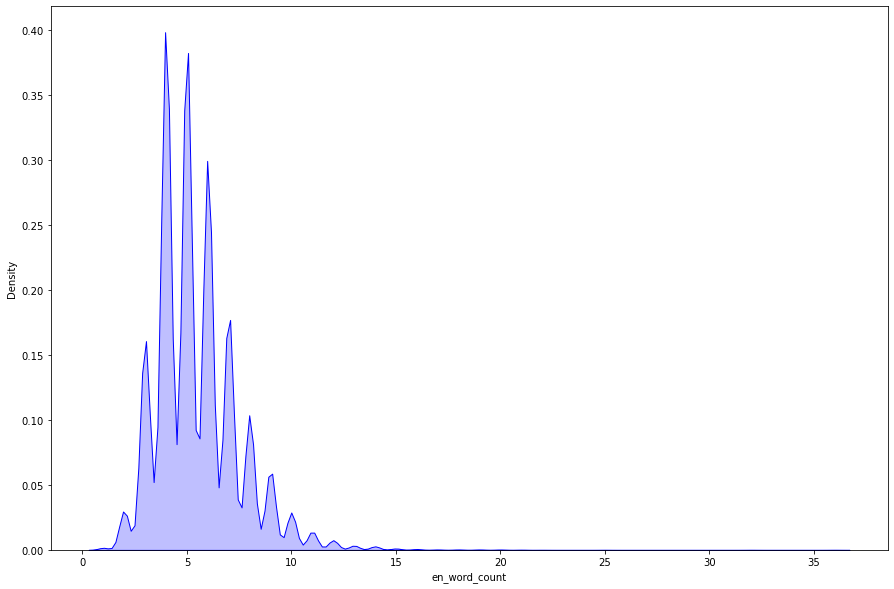

In [46]:
plt.figure(figsize=(15,10))
sns.kdeplot(x=df.en_word_count, shade=True, color='blue', label='Real')

## note lot of sentences are of 4 to 7 length

In [33]:
max(df.en_word_count)

36

<AxesSubplot:xlabel='mar_word_count', ylabel='Density'>

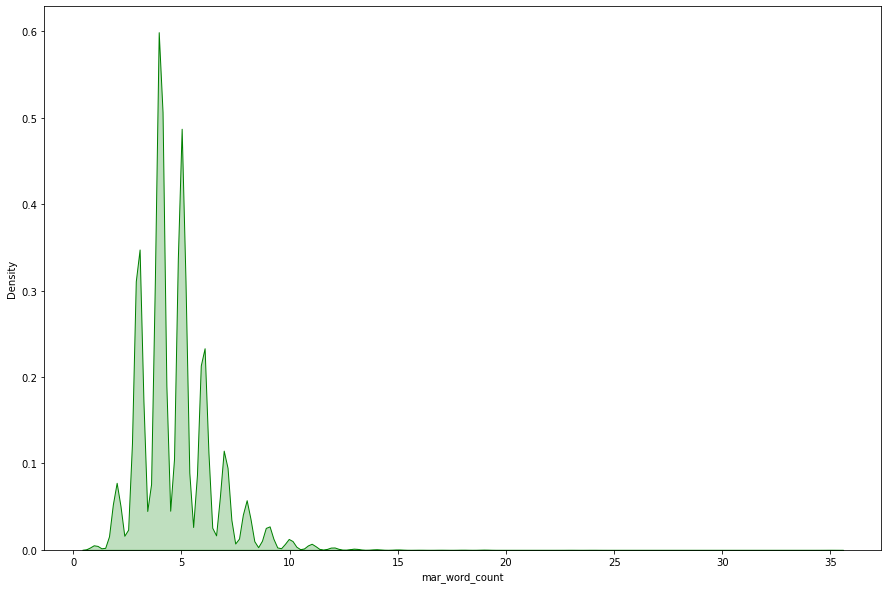

In [48]:
plt.figure(figsize=(15,10))
sns.kdeplot(x=df.mar_word_count, shade=True, color='green', label='Real')

In [35]:
max(df.mar_word_count)

35

D:\Machine_learning\Recurrent_Neural_Network\Recurrent_Env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

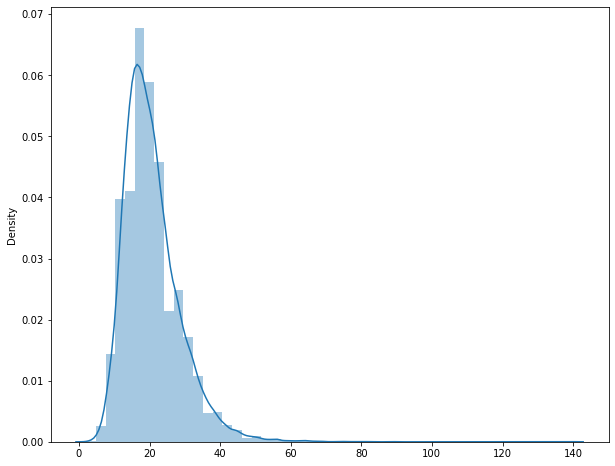

In [36]:
plt.figure(figsize=(10,8))
sns.distplot(x=df.en_char_count)

D:\Machine_learning\Recurrent_Neural_Network\Recurrent_Env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

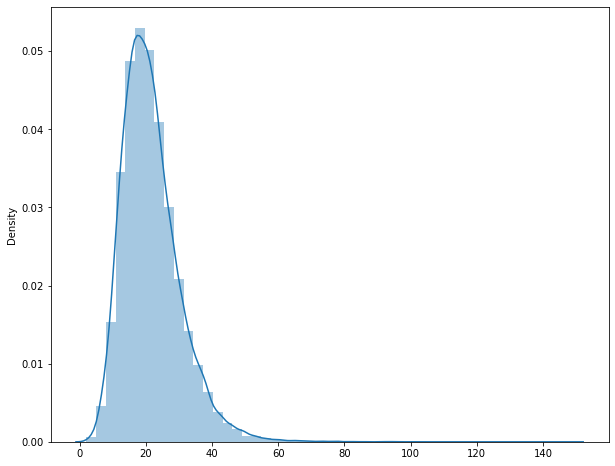

In [37]:
plt.figure(figsize=(10,8))
sns.distplot(x=df.mar_char_count)

### save cleaned text

In [49]:
df.head()

,English,Marathi,en_word_count,mar_word_count,mar_char_count,en_char_count
0,go,जा,1,1,2,2
1,run,पळ,1,1,2,3
2,run,धाव,1,1,3,3
3,run,पळा,1,1,3,3
4,run,धावा,1,1,4,3


In [50]:
df.to_csv("Data/cleaned.csv",index=None)

# Conclusion

* 41028 samples of sentenses
* Min len of both eng and mar sentence is 1
* Max len of both is 35 -- this will help for padding
* And we cleaned text removed all punctuatuins digits and expanded contractions in this notebook